<a href="https://colab.research.google.com/github/naren951/Sds/blob/master/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This analysis involves the dataset that contains the air quality of many places in india over several decades. However this particular project deals with the air quality index regarding Bengaluru in most parts.

In [ ]:
dataset_url="https://www.kaggle.com/shrutibhargava94/india-air-quality-data/"

### This is the URL to the kaggle dataset that we will be using in this analysis

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: naren951
Your Kaggle Key: ··········


100%|██████████| 5.22M/5.22M [00:00<00:00, 168MB/s]

In [ ]:
data_dir = './india-air-quality-data'

In [ ]:
import os
os.listdir(data_dir)

['data.csv']

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('/content/india-air-quality-data/data.csv',encoding = "ISO-8859-1")
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The dataset was parsed and upon observation it is obvious that it is too massive for simple analysis. Henceforth only Bengaluru will be considered for this.

In [ ]:
df_blr=df.loc[df['location']=="Bangalore"]

In [ ]:
df_blr

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
135530,77,11/2/1988,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,37.2,15.2,NaN,220.0,NaN,NaN,1988-02-11
135531,78,11/3/1988,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,77.9,32.0,NaN,142.0,NaN,NaN,1988-03-11
135532,79,11/2/1988,Karnataka,Bangalore,Karnataka Pollution Control Board,"Residential, Rural and other Areas",27.2,20.3,NaN,392.0,NaN,NaN,1988-02-11
135533,80,11/3/1988,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,23.1,13.4,NaN,356.0,NaN,NaN,1988-03-11
135534,81,11/2/1988,Karnataka,Bangalore,Karnataka Pollution Control Board,"Residential, Rural and other Areas",26.3,11.2,NaN,150.0,NaN,NaN,1988-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151687,598,17-03-15,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,14.0,14.0,53.0,NaN,"Department of Environmental Science, Jnanabhar...",NaN,2015-03-17
151688,598,19-03-15,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,17.0,27.0,69.0,NaN,"Department of Environmental Science, Jnanabhar...",NaN,2015-03-19
151689,598,25-03-15,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,12.0,16.0,53.0,NaN,"Department of Environmental Science, Jnanabhar...",NaN,2015-03-25
151690,598,26-03-15,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,11.0,23.0,70.0,NaN,"Department of Environmental Science, Jnanabhar...",NaN,2015-03-26


### Checking for null values

In [ ]:
df_blr.isna().sum()

stn_code                       2597
sampling_date                     0
state                             0
location                          0
agency                         2597
type                              0
so2                             204
no2                              50
rspm                            424
spm                            3332
location_monitoring_station     421
pm2_5                          6660
date                              1
dtype: int64

### The dataset is sorted based on date for easier analysis.

In [ ]:
df_blr.sort_values(by="date",ascending=False)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
151314,457,31-12-15,Karnataka,Bangalore,Karnataka State Pollution Control Board,"Residential, Rural and other Areas",2.0,24.0,74.0,NaN,"Yeshwanthpura, Bangalore",NaN,2015-12-31
150979,406,31-12-15,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,2.0,39.0,258.0,NaN,"Victoria Hospital, Bangalore",NaN,2015-12-31
150855,405,31-12-15,Karnataka,Bangalore,Karnataka State Pollution Control Board,Industrial Area,2.0,21.0,117.0,NaN,"Peenya Industrial Area, Bangalore",NaN,2015-12-31
151313,457,30-12-15,Karnataka,Bangalore,Karnataka State Pollution Control Board,"Residential, Rural and other Areas",2.0,13.0,91.0,NaN,"Yeshwanthpura, Bangalore",NaN,2015-12-30
150530,78,30-12-15,Karnataka,Bangalore,Karnataka State Pollution Control Board,"Residential, Rural and other Areas",2.0,16.0,182.0,NaN,"AMCO Batteries, Mysore Road, Bangalore",NaN,2015-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135532,79,11/2/1988,Karnataka,Bangalore,Karnataka Pollution Control Board,"Residential, Rural and other Areas",27.2,20.3,NaN,392.0,NaN,NaN,1988-02-11
135530,77,11/2/1988,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,37.2,15.2,NaN,220.0,NaN,NaN,1988-02-11
135539,78,12/1/1988,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,30.0,13.3,NaN,239.0,NaN,NaN,1988-01-12
135541,80,12/1/1988,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,18.7,11.1,NaN,246.0,NaN,NaN,1988-01-12


### Since we have 2 date based columns, i.e "sampling_date" and "date" we choose to drop the colummn sampling_data as it is of random formats.

In [ ]:
df_blr=df_blr.drop(columns="sampling_date")
df_blr

,stn_code,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
135530,77,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,37.2,15.2,NaN,220.0,NaN,NaN,1988-02-11
135531,78,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,77.9,32.0,NaN,142.0,NaN,NaN,1988-03-11
135532,79,Karnataka,Bangalore,Karnataka Pollution Control Board,"Residential, Rural and other Areas",27.2,20.3,NaN,392.0,NaN,NaN,1988-02-11
135533,80,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,23.1,13.4,NaN,356.0,NaN,NaN,1988-03-11
135534,81,Karnataka,Bangalore,Karnataka Pollution Control Board,"Residential, Rural and other Areas",26.3,11.2,NaN,150.0,NaN,NaN,1988-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...
151687,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,14.0,14.0,53.0,NaN,"Department of Environmental Science, Jnanabhar...",NaN,2015-03-17
151688,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,17.0,27.0,69.0,NaN,"Department of Environmental Science, Jnanabhar...",NaN,2015-03-19
151689,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,12.0,16.0,53.0,NaN,"Department of Environmental Science, Jnanabhar...",NaN,2015-03-25
151690,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,11.0,23.0,70.0,NaN,"Department of Environmental Science, Jnanabhar...",NaN,2015-03-26


### The column pm2_5 is dropped because everything in it is a NaN value.

In [ ]:
df_blr=df_blr.drop(columns="pm2_5")


In [ ]:
df_blr

,stn_code,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
135530,77,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,37.2,15.2,NaN,220.0,NaN,1988-02-11
135531,78,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,77.9,32.0,NaN,142.0,NaN,1988-03-11
135532,79,Karnataka,Bangalore,Karnataka Pollution Control Board,"Residential, Rural and other Areas",27.2,20.3,NaN,392.0,NaN,1988-02-11
135533,80,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,23.1,13.4,NaN,356.0,NaN,1988-03-11
135534,81,Karnataka,Bangalore,Karnataka Pollution Control Board,"Residential, Rural and other Areas",26.3,11.2,NaN,150.0,NaN,1988-02-11
...,...,...,...,...,...,...,...,...,...,...,...
151687,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,14.0,14.0,53.0,NaN,"Department of Environmental Science, Jnanabhar...",2015-03-17
151688,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,17.0,27.0,69.0,NaN,"Department of Environmental Science, Jnanabhar...",2015-03-19
151689,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,12.0,16.0,53.0,NaN,"Department of Environmental Science, Jnanabhar...",2015-03-25
151690,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,11.0,23.0,70.0,NaN,"Department of Environmental Science, Jnanabhar...",2015-03-26


### The dataset is split into smaller datasets each containing data from 5 years.

In [ ]:
df_blr_1995 = df_blr.loc[df_blr['date'] < '1995-01-01']
df_blr_1995

,stn_code,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
135530,77,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,37.2,15.2,NaN,220.0,NaN,1988-02-11
135531,78,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,77.9,32.0,NaN,142.0,NaN,1988-03-11
135532,79,Karnataka,Bangalore,Karnataka Pollution Control Board,"Residential, Rural and other Areas",27.2,20.3,NaN,392.0,NaN,1988-02-11
135533,80,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,23.1,13.4,NaN,356.0,NaN,1988-03-11
135534,81,Karnataka,Bangalore,Karnataka Pollution Control Board,"Residential, Rural and other Areas",26.3,11.2,NaN,150.0,NaN,1988-02-11
...,...,...,...,...,...,...,...,...,...,...,...
135765,80,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,5.3,6.0,NaN,50.0,NaN,1991-07-01
135769,78,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,24.2,19.8,NaN,138.0,NaN,1991-08-01
135770,80,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,11.7,6.3,NaN,23.0,NaN,1991-08-01
135782,78,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,NaN,NaN,NaN,78.0,NaN,1992-02-01


In [ ]:

df_blr_2005 = df_blr.loc[df_blr['date'] < '2005-01-01']
df_blr_2005 = df_blr_2005[df_blr_2005['date'] >= '1995-01-01']
df_blr_2005

,stn_code,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
135838,77,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,NaN,NaN,NaN,NaN,NaN,1995-01-01
135839,77,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,NaN,NaN,NaN,NaN,NaN,1995-02-01
135840,77,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,NaN,NaN,NaN,NaN,NaN,1995-03-01
135841,77,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,NaN,NaN,NaN,NaN,NaN,1995-04-01
135842,77,Karnataka,Bangalore,Karnataka Pollution Control Board,Industrial Area,NaN,NaN,NaN,NaN,NaN,1995-05-01
...,...,...,...,...,...,...,...,...,...,...,...
136641,406,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,6.0,41.0,57.00,122.0,"Victoria Hospital, Bangalore",2004-12-16
136642,406,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,8.0,65.0,89.00,186.0,"Victoria Hospital, Bangalore",2004-12-21
136643,406,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,8.0,61.0,82.00,237.0,"Victoria Hospital, Bangalore",2004-12-23
136644,406,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,9.0,42.0,70.67,181.0,"Victoria Hospital, Bangalore",2004-12-27


In [ ]:
df_blr_2010 = df_blr.loc[df_blr['date'] < '2010-01-01']
df_blr_2010 = df_blr_2010[df_blr_2010['date'] >= '2005-01-01']
df_blr_2010

,stn_code,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
136862,NaN,Karnataka,Bangalore,NaN,Industrial Areas,6.3,44.0,116.0,193.0,AMCO Batteries,2005-05-01
136863,NaN,Karnataka,Bangalore,NaN,Industrial Areas,6.8,41.9,58.0,120.0,AMCO Batteries,2005-07-01
136864,NaN,Karnataka,Bangalore,NaN,Industrial Areas,6.5,36.6,176.0,241.0,AMCO Batteries,2005-11-01
136865,NaN,Karnataka,Bangalore,NaN,Industrial Areas,8.1,51.2,115.0,169.0,AMCO Batteries,2005-01-15
136866,NaN,Karnataka,Bangalore,NaN,Industrial Areas,7.0,39.5,120.0,193.0,AMCO Batteries,2005-01-18
...,...,...,...,...,...,...,...,...,...,...,...
142238,NaN,Karnataka,Bangalore,NaN,Sensitive Areas,12.1,34.3,39.0,148.0,Victoria Hospital,2009-02-11
142239,NaN,Karnataka,Bangalore,NaN,Sensitive Areas,14.6,34.3,42.0,117.0,Victoria Hospital,2009-06-11
142240,NaN,Karnataka,Bangalore,NaN,Sensitive Areas,13.2,31.1,106.0,257.0,Victoria Hospital,2009-09-11
142241,NaN,Karnataka,Bangalore,NaN,Sensitive Areas,14.7,35.9,38.0,116.0,Victoria Hospital,2009-11-11


In [ ]:

df_blr_2010.isna().sum()

stn_code                       2597
state                             0
location                          0
agency                         2597
type                              0
so2                             159
no2                               6
rspm                              2
spm                               5
location_monitoring_station       0
date                              0
dtype: int64

In [ ]:
df_blr_2015 = df_blr[df_blr['date'] >= '2010-01-01']
df_blr_2015

,stn_code,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
143006,77,Karnataka,Bangalore,Karnataka State Pollution Control Board,Industrial Area,14.866667,28.30,257.0,NaN,"Graphite India, White Field Road, Bangalore",2011-11-01
143007,77,Karnataka,Bangalore,Karnataka State Pollution Control Board,Industrial Area,17.425000,31.65,551.0,NaN,"Graphite India, White Field Road, Bangalore",2011-01-13
143008,77,Karnataka,Bangalore,Karnataka State Pollution Control Board,Industrial Area,20.000000,32.00,356.0,NaN,"Graphite India, White Field Road, Bangalore",2011-01-18
143009,77,Karnataka,Bangalore,Karnataka State Pollution Control Board,Industrial Area,16.000000,30.00,159.0,NaN,"Graphite India, White Field Road, Bangalore",2011-01-24
143010,77,Karnataka,Bangalore,Karnataka State Pollution Control Board,Industrial Area,16.000000,31.00,52.0,NaN,"Graphite India, White Field Road, Bangalore",2011-01-31
...,...,...,...,...,...,...,...,...,...,...,...
151687,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,14.000000,14.00,53.0,NaN,"Department of Environmental Science, Jnanabhar...",2015-03-17
151688,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,17.000000,27.00,69.0,NaN,"Department of Environmental Science, Jnanabhar...",2015-03-19
151689,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,12.000000,16.00,53.0,NaN,"Department of Environmental Science, Jnanabhar...",2015-03-25
151690,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,11.000000,23.00,70.0,NaN,"Department of Environmental Science, Jnanabhar...",2015-03-26


### We will be considering only the data recorded between the years 2005 and 2015 as the data before that time is inadequate

In [ ]:
df_blr_2015.isna().sum()

stn_code                          0
state                             0
location                          0
agency                            0
type                              0
so2                               4
no2                               4
rspm                              1
spm                            3282
location_monitoring_station       0
date                              0
dtype: int64




### The column spm is not much of use as its data being filled in rspm and it has only NaN. 

### From simple considerations TSPM: Stands for Total Suspended Particulate Matter and would essentially be the concentration one would get when a high-volume bulk sampling is done on a filter substrate. RSPM is that fraction of TSPM which is readily inhaled by humans through their respiratory system and in general, considered as particulate matter with their diameter (aerodynamic) less than 2.5 micrometers. Larger particles would be filtered in the nasal duct.

### Hence spm value is not required as it is irrelevent and rspm can be used instead.

In [ ]:
df_blr_2015 = df_blr_2015.drop(columns='spm')
df_blr_2015

,stn_code,state,location,agency,type,so2,no2,rspm,location_monitoring_station,date
143006,77,Karnataka,Bangalore,Karnataka State Pollution Control Board,Industrial Area,14.866667,28.30,257.0,"Graphite India, White Field Road, Bangalore",2011-11-01
143007,77,Karnataka,Bangalore,Karnataka State Pollution Control Board,Industrial Area,17.425000,31.65,551.0,"Graphite India, White Field Road, Bangalore",2011-01-13
143008,77,Karnataka,Bangalore,Karnataka State Pollution Control Board,Industrial Area,20.000000,32.00,356.0,"Graphite India, White Field Road, Bangalore",2011-01-18
143009,77,Karnataka,Bangalore,Karnataka State Pollution Control Board,Industrial Area,16.000000,30.00,159.0,"Graphite India, White Field Road, Bangalore",2011-01-24
143010,77,Karnataka,Bangalore,Karnataka State Pollution Control Board,Industrial Area,16.000000,31.00,52.0,"Graphite India, White Field Road, Bangalore",2011-01-31
...,...,...,...,...,...,...,...,...,...,...
151687,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,14.000000,14.00,53.0,"Department of Environmental Science, Jnanabhar...",2015-03-17
151688,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,17.000000,27.00,69.0,"Department of Environmental Science, Jnanabhar...",2015-03-19
151689,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,12.000000,16.00,53.0,"Department of Environmental Science, Jnanabhar...",2015-03-25
151690,598,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,11.000000,23.00,70.0,"Department of Environmental Science, Jnanabhar...",2015-03-26


In [ ]:
df_blr_2010.location_monitoring_station.unique()

array(['AMCO Batteries', 'Graphite India', 'KHB Indl Area',
       'Peenya Indl. Area', 'Victoria Hospital', 'Yeshwanthpura',
       'Anand Rao Circle'], dtype=object)

In [ ]:
df_blr_2015.location_monitoring_station.unique()

array(['Graphite India, White Field Road, Bangalore',
       'AMCO Batteries, Mysore Road, Bangalore',
       'KHB Industrial Area, Near R.R. Founders, Yelahanka, Bangalore',
       'Peenya Industrial Area, Bangalore',
       'Victoria Hospital, Bangalore', 'Yeshwanthpura, Bangalore',
       'Department of Environmental Science, Jnanabharathi Campus, Bangalore University'],
      dtype=object)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_blr_2015.iloc[:, 5:8].values)
df_blr_2015.iloc[:,5:8] = imputer.transform(df_blr_2015.iloc[:, 5:8].values)
df_blr_2015.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3282 entries, 143006 to 151691
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     3282 non-null   object 
 1   state                        3282 non-null   object 
 2   location                     3282 non-null   object 
 3   agency                       3282 non-null   object 
 4   type                         3282 non-null   object 
 5   so2                          3282 non-null   float64
 6   no2                          3282 non-null   float64
 7   rspm                         3282 non-null   float64
 8   location_monitoring_station  3282 non-null   object 
 9   date                         3282 non-null   object 
dtypes: float64(3), object(7)
memory usage: 282.0+ KB


Filling NaN values with the mean of the column


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_blr_2010.iloc[:, 5:8].values)
df_blr_2010.iloc[:,5:8] = imputer.transform(df_blr_2010.iloc[:, 5:8].values)
df_blr_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 136862 to 142242
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     0 non-null      object 
 1   state                        2597 non-null   object 
 2   location                     2597 non-null   object 
 3   agency                       0 non-null      object 
 4   type                         2597 non-null   object 
 5   so2                          2597 non-null   float64
 6   no2                          2597 non-null   float64
 7   rspm                         2597 non-null   float64
 8   spm                          2592 non-null   float64
 9   location_monitoring_station  2597 non-null   object 
 10  date                         2597 non-null   object 
dtypes: float64(4), object(7)
memory usage: 243.5+ KB


In [ ]:
df_blr_2010['agency']=df_blr_2010['agency'].fillna('Karnataka State Pollution Control Board')

### Since the agency column in 2010 is empty we are filling it with the same value as in 2015

In [ ]:
df_blr_2015.columns

Index(['stn_code', 'state', 'location', 'agency', 'type', 'so2', 'no2', 'rspm',
       'location_monitoring_station', 'date'],
      dtype='object')

In [ ]:



stn_add_2010 = df_blr_2010.location_monitoring_station.unique()
stn_add_2010

array(['AMCO Batteries', 'Graphite India', 'KHB Indl Area',
       'Peenya Indl. Area', 'Victoria Hospital', 'Yeshwanthpura',
       'Anand Rao Circle'], dtype=object)

In [ ]:
stn_add = df_blr_2015.location_monitoring_station.unique()

In [ ]:

stn_id = df_blr_2015.stn_code.unique()
stn_id = [int(i) for i in stn_id]

In [ ]:

dict_stn = dict(zip(stn_id, stn_add))
dict_stn

{77: 'Graphite India, White Field Road, Bangalore',
 78: 'AMCO Batteries, Mysore Road, Bangalore',
 404: 'KHB Industrial Area, Near R.R. Founders, Yelahanka, Bangalore',
 405: 'Peenya Industrial Area, Bangalore',
 406: 'Victoria Hospital, Bangalore',
 457: 'Yeshwanthpura, Bangalore',
 598: 'Department of Environmental Science, Jnanabharathi Campus, Bangalore University'}

In [ ]:
dict_stn[77] = [dict_stn[77], stn_add_2010[1]]
dict_stn[78] = [dict_stn[78], stn_add_2010[0]]
dict_stn[404] = [dict_stn[404], stn_add_2010[2]]
dict_stn[405] = [dict_stn[405], stn_add_2010[3]]
dict_stn[406] = [dict_stn[406], stn_add_2010[4]]
dict_stn[457] = [dict_stn[457], stn_add_2010[5]]
dict_stn[598] = [dict_stn[598], stn_add_2010[6]]

dict_stn

{77: ['Graphite India, White Field Road, Bangalore', 'Graphite India'],
 78: ['AMCO Batteries, Mysore Road, Bangalore', 'AMCO Batteries'],
 404: ['KHB Industrial Area, Near R.R. Founders, Yelahanka, Bangalore',
  'KHB Indl Area'],
 405: ['Peenya Industrial Area, Bangalore', 'Peenya Indl. Area'],
 406: ['Victoria Hospital, Bangalore', 'Victoria Hospital'],
 457: ['Yeshwanthpura, Bangalore', 'Yeshwanthpura'],
 598: ['Department of Environmental Science, Jnanabharathi Campus, Bangalore University',
  'Anand Rao Circle']}

# Visualisation

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df_blr_2010["type"].value_counts()

Industrial Areas          1325
Residential and others     776
Sensitive Areas            496
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f03190b79b0>,
 [Text(-0.03525671852285831, 1.099434838359691, 'Industrial Areas'),
  Text(-0.5916997069662222, -0.9273033251186404, 'Residential and others'),
  Text(0.9078619630539945, -0.6211172643227266, 'Sensitive Areas')],
 [Text(-0.01923093737610453, 0.5996917300143769, '51.0%'),
  Text(-0.32274529470884844, -0.5058018137010766, '29.9%'),
  Text(0.49519743439308783, -0.33879123508512354, '19.1%')])

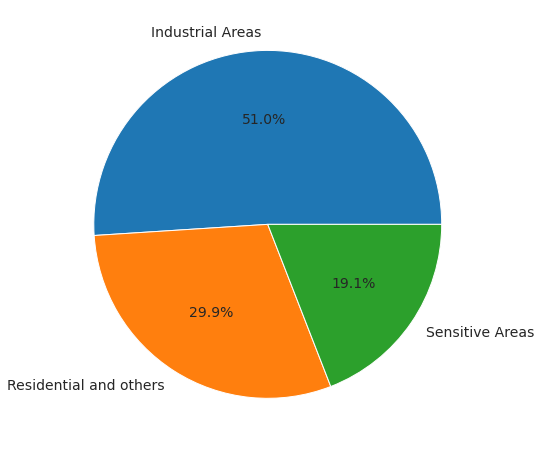

In [ ]:
plt.pie(x = df_blr_2010["type"].value_counts(), data = df_blr_2010,radius=1,labels=sorted(df_blr_2010["type"].unique()), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f0318be84a8>,
 [Text(0.2566363370519645, 1.0696437680389441, 'Industrial Area'),
  Text(-0.9650107851284293, -0.5279717649513208, 'Residential, Rural and other Areas'),
  Text(0.73854405203147, -0.8152010078556929, 'Sensitive Area')],
 [Text(0.1399834565737988, 0.5834420552939695, '42.5%'),
  Text(-0.5263695191609614, -0.28798459906435675, '30.9%'),
  Text(0.40284221019898364, -0.4446550951940143, '26.6%')])

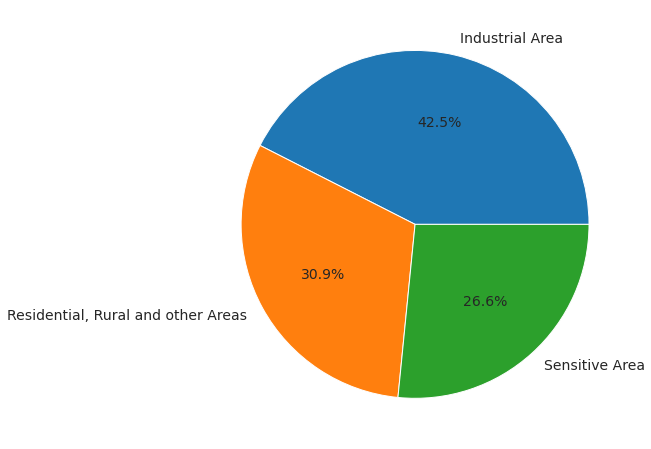

In [ ]:
plt.pie(x = df_blr_2015["type"].value_counts(), data = df_blr_2015,radius=1,labels=sorted(df_blr_2015["type"].unique()), autopct='%1.1f%%')

In [ ]:
grp1 = df_blr_2010.groupby(["type"]).mean()["so2"].to_frame()
grp2 = df_blr_2015.groupby(["type"]).mean()["so2"].to_frame()
grp3 = df_blr_2010.groupby(["type"]).mean()["no2"].to_frame()
grp4 = df_blr_2015.groupby(["type"]).mean()["no2"].to_frame()
grp5 = df_blr_2010.groupby(["type"]).mean()["rspm"].to_frame()
grp6 = df_blr_2015.groupby(["type"]).mean()["rspm"].to_frame()

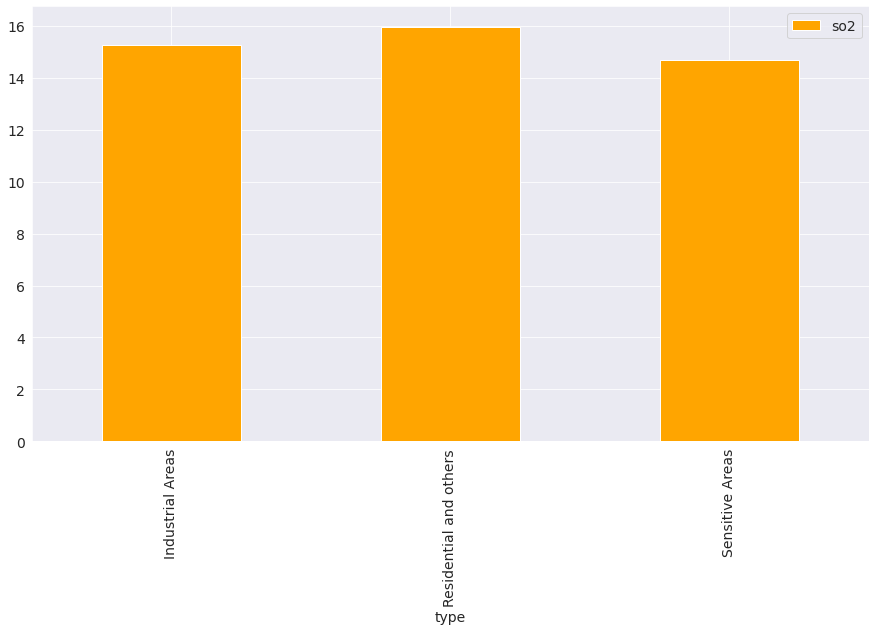

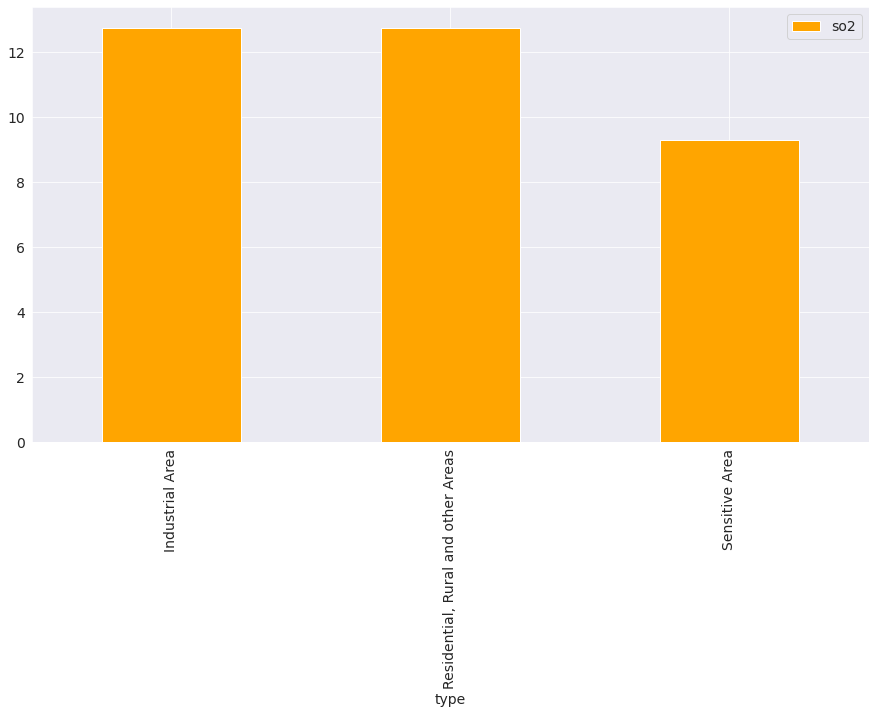

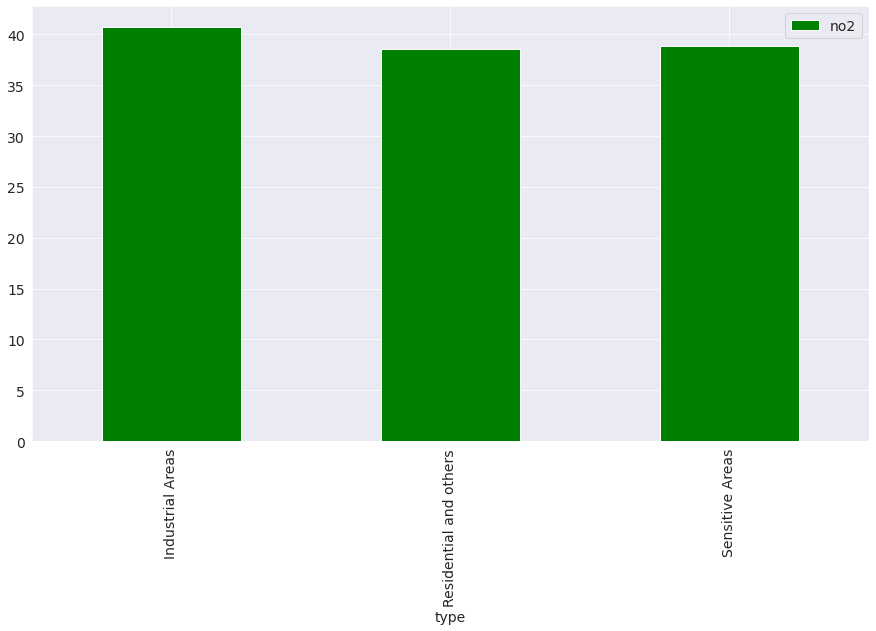

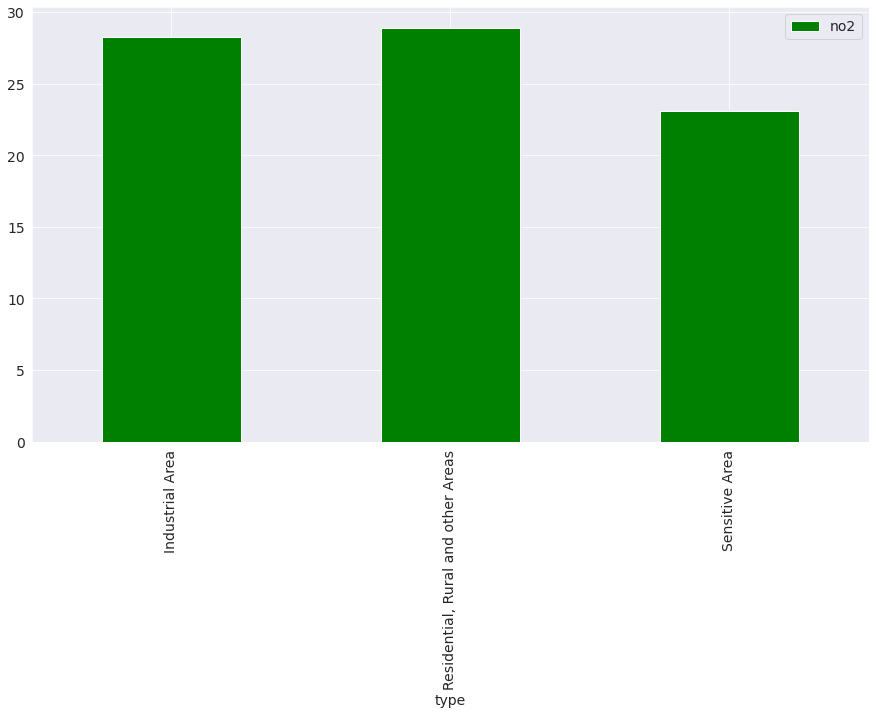

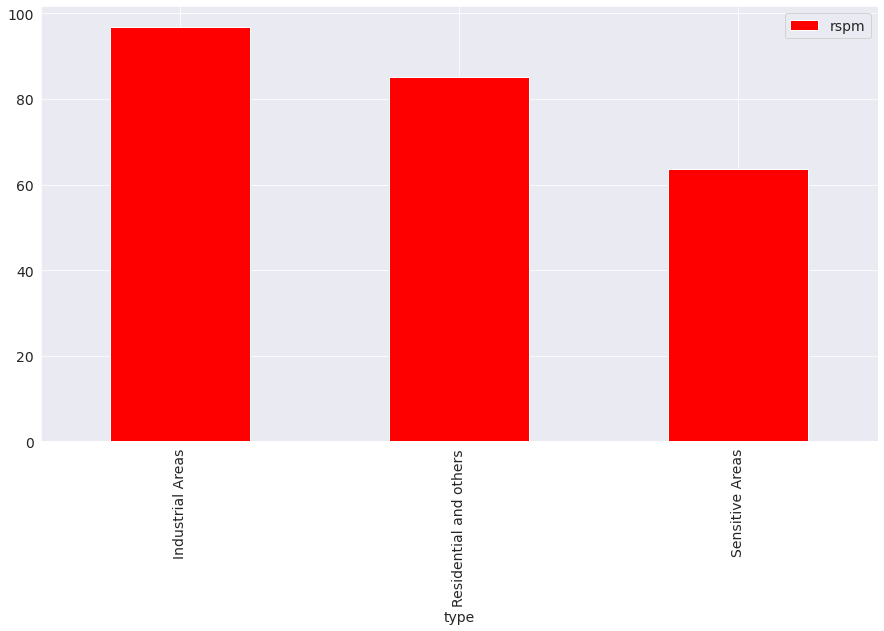

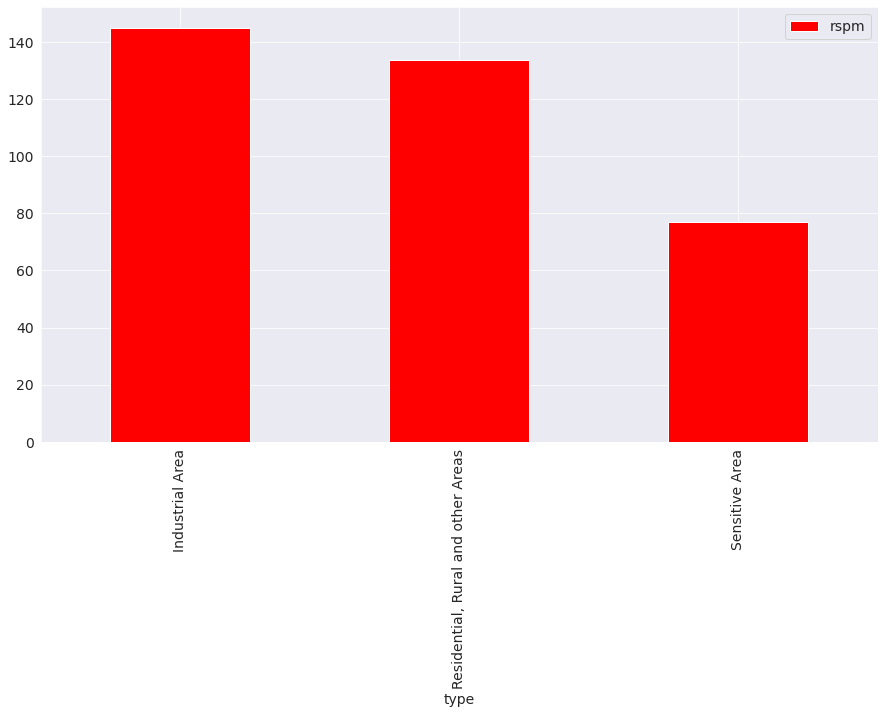

In [ ]:
grp1.plot(kind='bar',color='orange')
grp2.plot(kind='bar',color='orange')
grp3.plot(kind='bar',color='green')
grp4.plot(kind='bar',color='green')
grp5.plot(kind='bar',color='red')
grp6.plot(kind='bar',color='red')
plt.show()

In [ ]:
df_blr_2011 = df_blr[df_blr['date'] >= '2011-01-01']
df_blr_2011 = df_blr_2011[df_blr_2011['date'] < '2012-01-01']
df_blr_2012 = df_blr[df_blr['date'] >= '2012-01-01']
df_blr_2012 = df_blr_2012[df_blr_2012['date'] < '2013-01-01']
df_blr_2013 = df_blr[df_blr['date'] >= '2013-01-01']
df_blr_2013 = df_blr_2013[df_blr_2013['date'] < '2014-01-01']
df_blr_2014 = df_blr[df_blr['date'] >= '2014-01-01']
df_blr_2014 = df_blr_2014[df_blr_2014['date'] < '2015-01-01']
df_blr_215  = df_blr[df_blr['date'] >= '2015-01-01']
df_blr_2011 = df_blr_215[df_blr_215['date'] < '2016-01-01']


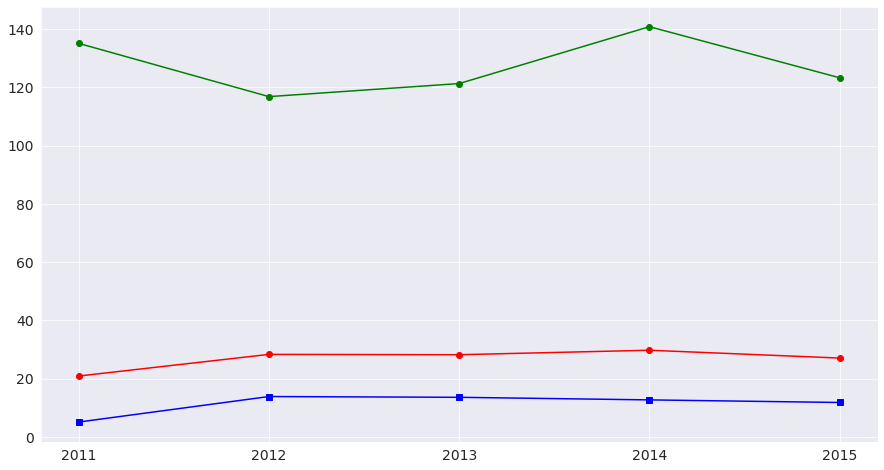

In [ ]:
datano2=[df_blr_2011.mean()["no2"],df_blr_2012.mean()["no2"],df_blr_2013.mean()["no2"],df_blr_2014.mean()["no2"],df_blr_2015.mean()["no2"]]
dataso2=[df_blr_2011.mean()["so2"],df_blr_2012.mean()["so2"],df_blr_2013.mean()["so2"],df_blr_2014.mean()["so2"],df_blr_2015.mean()["so2"]]
datarspm=[df_blr_2011.mean()["rspm"],df_blr_2012.mean()["rspm"],df_blr_2013.mean()["rspm"],df_blr_2014.mean()["rspm"],df_blr_2015.mean()["rspm"]]
years=["2011","2012","2013","2014","2015"]
d=list(zip(years,datano2))
plt.plot(years,datano2,'o-r')
plt.plot(years,dataso2,'s-b')
plt.plot(years,datarspm,'o-g')


# Normalization and Standardization

In [ ]:
df_chem=df_blr.loc[df_blr['date'] >'2005-01-01'].iloc[:,5:8]
df_chem.isna().sum()

so2     163
no2      10
rspm      3
dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_chem.iloc[:, 0:3].values)
df_chem.iloc[:,0:3] = imputer.transform(df_chem.iloc[:, 0:3].values)
df_chem.isna().sum()

so2     0
no2     0
rspm    0
dtype: int64

In [ ]:
df_chem.head()

,so2,no2,rspm
136862,6.3,44.0,116.0
136863,6.8,41.9,58.0
136864,6.5,36.6,176.0
136865,8.1,51.2,115.0
136866,7.0,39.5,120.0


In [ ]:
#df_chem.mean()
so2_mean = df_chem['so2'].mean() 
no2_mean = df_chem['no2'].mean() 
rspm_mean = df_chem['rspm'].mean() 
so2_var = df_chem['so2'].std() **2
no2_var = df_chem['no2'].std() **2
rspm_var = df_chem['rspm'].std() **2
mean_vs_pol = {'Pollutant': ['SO2','NO2','RSPM'],
               'Mean': [so2_mean,no2_mean,rspm_mean],
               'Variance': [so2_var,no2_var,rspm_var]
        }

mean_t = pd.DataFrame(mean_vs_pol, columns = ['Pollutant', 'Mean','Variance'])

print (mean_t)



  Pollutant        Mean     Variance
0       SO2   13.334341    29.714001
1       NO2   32.660816   111.714445
2      RSPM  107.276404  5908.800339


# Why is Normalization important?

### Normalization is generally required when we are dealing with attributes on a different scale, otherwise, it may lead to a dilution in effectiveness of an  equally important attribute (on lower scale) because of other attribute having values on larger scale.
### In simple words, when multiple attributes are there but attributes have values on different scales, this may lead to poor data models while performing data mining operations. So they are normalized to bring all the attributes on the same scale.

## Commonly used Scaling Techniques:
## 1.StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
### 2.MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.

## We have used Standard scaling technique as it follows Standard Normal Distribution. This sets mean to 0 and the variance to 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_scaled = scaler.fit_transform(df_chem)
df_chem_norm = pd.DataFrame(x_scaled)
df_chem_norm.rename(columns={0: 'SO 2', 1: 'NO 2', 2: 'RSPM'}, inplace=True)

df_chem_norm.head()


,SO 2,NO 2,RSPM
0,-1.290565,1.072912,0.113497
1,-1.198832,0.874210,-0.641101
2,-1.253871,0.372725,0.894115
3,-0.960325,1.754175,0.100486
4,-1.162138,0.647123,0.165538


In [ ]:
df_chem_norm.mean()
#mean is approximated to 0.

SO 2   -7.132243e-15
NO 2   -5.315738e-15
RSPM    1.304356e-16
dtype: float64

In [ ]:
df_chem_norm.std()
#standard deviation is approximated to 1.We can also infer that the variance is also 1.

SO 2    1.000085
NO 2    1.000085
RSPM    1.000085
dtype: float64

In [ ]:
df_chem.skew()

so2     1.210348
no2     1.132662
rspm    2.059178
dtype: float64

Look at the values of Skewness. Skewness involves the symmetry of the distribution. Skewness that is normal involves a perfectly symmetric distribution. A positively skewed distribution has scores clustered to the left, with the tail extending to the right. A negatively skewed distribution has scores clustered to the right, with the tail extending to the left. Skewness is 0 in a normal distribution, so the farther away from 0, the more non-normal the distribution. 

In [ ]:
df_chem.describe()

,so2,no2,rspm
count,5879.000000,5879.000000,5879.000000
mean,13.334341,32.660816,107.276404
std,5.451055,10.569505,76.868721
min,2.000000,4.000000,12.670000
25%,10.000000,28.300000,53.000000
50%,14.000000,31.000000,85.780000
75%,16.000000,39.400000,138.666667
max,62.900000,186.000000,902.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0318808ef0>,
      dtype=object)

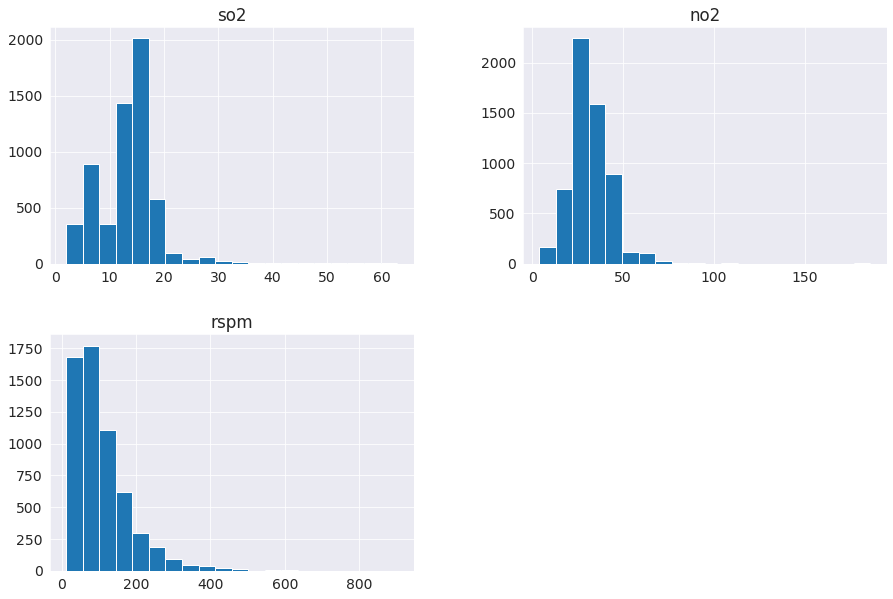

In [ ]:
df_chem.hist(stacked=True, bins=20, figsize=(15,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9f044ddd8>,
      dtype=object)

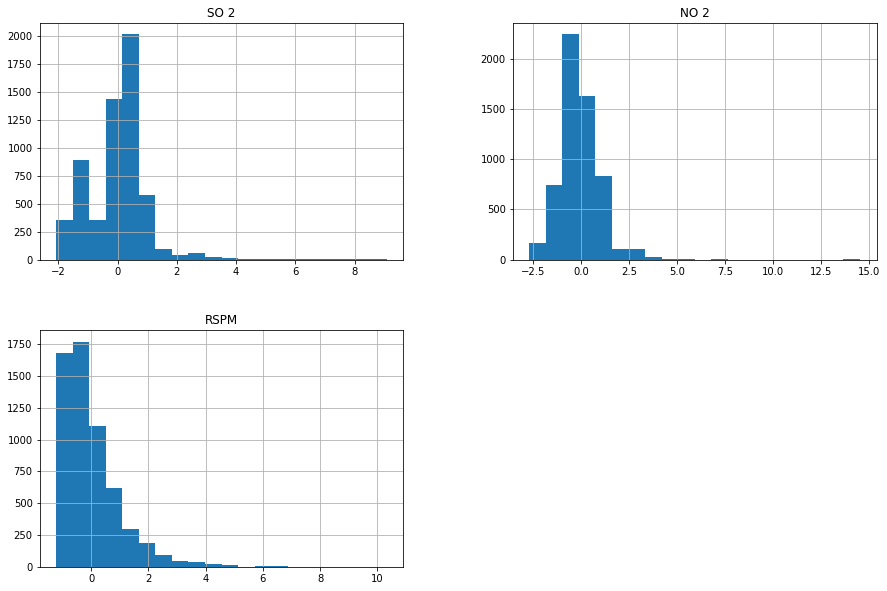

In [ ]:
df_chem_norm.hist(stacked=True, bins=20, figsize=(15,10))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


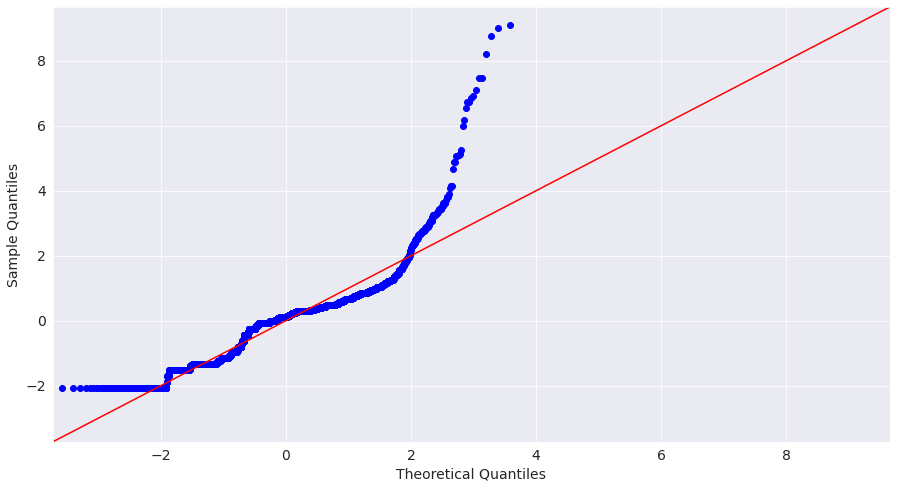

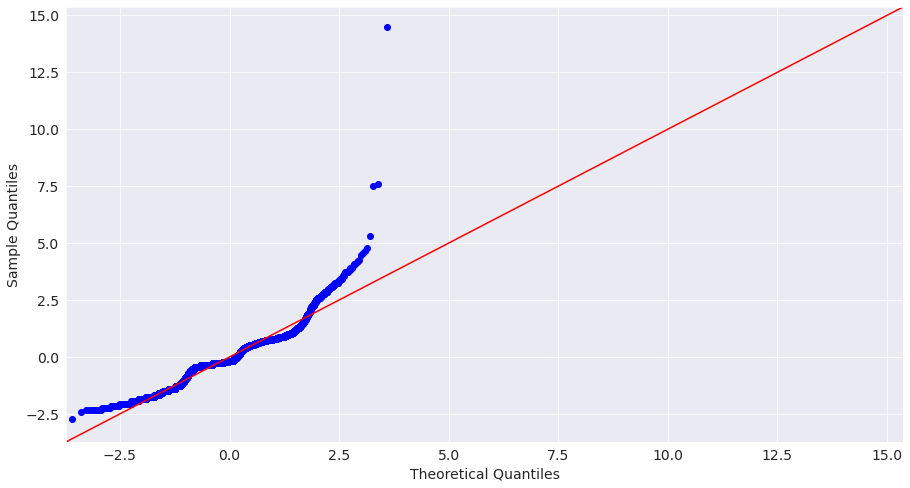

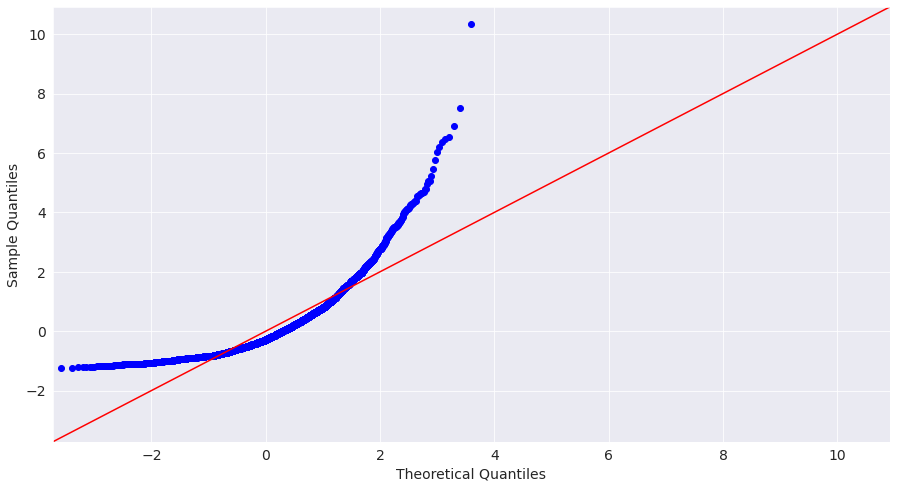

In [ ]:
import statsmodels.api as sm
import pylab

sm.qqplot(df_chem_norm['SO 2'], line='45')
sm.qqplot(df_chem_norm['NO 2'], line='45')
sm.qqplot(df_chem_norm['RSPM'], line='45')

pylab.show()

# Hypothesis Testing


In [ ]:
df_merged = pd.concat([df_blr_2010, df_blr_2015], axis=0)

In [ ]:
mean_so2 = df_merged.mean()['so2']
mean_no2 = df_merged.mean()['no2']

The objective here is to conclude whether the AQI (Air Quality Index) levels meet a specific requirement so that the quality levels are satisfactory. According to studies, a level of AQI less than 30 is considered to be good (non-polluted) for SO2 levels and that of less than 50 is said to be good for NO2 levels. A Hypothesis test can be performed for SO2 and NO2 respectively to infer the quality of air.

For SO2:

H0: μ >= 30, H1: μ < 30

For NO2:

H0: μ >= 50, H1: μ < 50

The mean could have come from a population whose mean is greater than the specified satisfactory value. Hence, we will perform a hypothesis test.

In [ ]:
sample_no2_std=df_merged.std()['no2']
sample_so2_std=df_merged.std()['so2']

In [ ]:
sample_so2_mean=sample_so2.mean()
sample_no2_mean=sample_no2.mean()

In [ ]:
sample_so2_zscore=(mean_so2-30)/sample_so2_std
sample_no2_zscore=(mean_no2-50)/sample_no2_std
mean_so2

13.388307526745056

In [ ]:
import scipy.stats as st

p_values_so2 = st.norm.sf(abs(sample_so2_zscore))
p_values_no2 = st.norm.sf(abs(sample_no2_zscore))

In [ ]:
p_values_so2

0.001175931354801647

In [ ]:
p_values_no2

0.05054018079678436

A significance level of <= 0.05 can be considered. From the P-Values calculated, we can conclude that the SO2 and the NO2 levels are below the specified level and hence meet the requirements for 'good air-quality' for the years 2005-2015.

# Thank You!